In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
# NP Necessary imports

In [161]:
R_o = 6.957e8
# NP Radius of Sun
G = 6.67e-11
# NP Gravatational constant
L_o = 3.828e26
# NP Luminosity of Sun
M_o = 2e30
# NP Mass of Sun
m_p = 1.67e-27
# NP Mass of proton
h = 6.63e-34
# NP Planck's constant
c = 3e8
# NP Speed of light
o = 5.67e-8
# NP Stefan-Boltzmann constant
# NP Useful constants in SI (mks) units

<h1>Problem 4</h1>

<h2>(b)</h2>

In [147]:
M = ((2.02 *8) /(np.sqrt(4 *np.pi) *G **(3/2)))\
    *np.sqrt(3 /np.pi) *((h *c) **(3/2) /(8\
    **(3/2) *(2 *m_p) **2))
# NP Calculating mass of relativistic white dwarf
print('Fully relativistic mass: ' +format(M /M_o,\
    '.2E') +' Solar Masses')
# NP Printing result

Fully relativistic mass: 1.44E+00 Solar Masses


<h1>Problem 5</h1>

<h2>(a)</h2>

In [148]:
opa = pd.read_csv('/d/users/nikhil/Downloads/OPAL_SolarComposition.txt')
# NP Reading in raw text file
goodopa = opa.to_numpy()
# NP Converting to numpy array
betteropa = [np.fromstring(goodopa[i][0], dtype = float, sep = ' ').tolist()\
    for i in range(len(goodopa))]
# NP Creating a table for opacities and temps., skipping first row
bestopa = [betteropa[i+1][1:] for i in range(len(betteropa) -1)]
# NP Creating a list of only opacities
row_lengths = []
for row in bestopa:
    row_lengths.append(len(row))
max_length = max(row_lengths)
for row in bestopa:
    while len(row) < max_length:
        row.append(0)
pristineopa = np.array(bestopa)
# NP Creating numpy array of opacities to better parse through array
logTs = np.array([betteropa[i+1][0] for i in range(len(betteropa)-1)])
# NP Creating array of temperatures
logRs = np.array(np.fromstring(goodopa[0][0][6:], dtype = float, sep = ' '))
# NP Creating array of R's
Tgrid = np.array([[t for r in range(len(logRs))] for t in logTs])
# NP Creating 2D numpy array of temperatures
Rgrid = np.array([[r for r in logRs] for t in range(len(logTs))])
# NP Creating 2D numpy array of temperatures
rhos = np.array([np.array([np.round(r +3 *(t -6) ,3) for r in logRs])\
    for t in logTs])
# NP Creating density grip for each opacity

/tmp/ipykernel_3361101/2143050322.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  betteropa = [np.fromstring(goodopa[i][0], dtype = float, sep = ' ').tolist()\


In [149]:
fillinopa = interp2d(logRs, logTs, pristineopa, kind = 'cubic')
# NP Interpolating over Rs and Ts to fill in all values for opacity

In [150]:
r, m_r, l_r, T_r, rho_r, logP_r = np.loadtxt('/d/users/nikhil/'
    'Downloads/SolarModel.csv', unpack = True, skiprows = 1,\
    usecols = (0, 1, 2, 3, 4, 5), delimiter = ',')
# NP Reading in table quantities

In [151]:
usefulTs = [np.log10(i) +6 for i in T_r]
# NP Converting to more useful log T space
usefulrhos = [np.log10(i) for i in rho_r]
# NP Converting to more useful log density space
usefulRs = [usefulrhos[i] -3 *(usefulTs[i]-6) for i\
    in range(len(r))]
# NP Converting to more useful log Rs to parse opacities

In [197]:
n_rad = np.array([(3e-2 *fillinopa(usefulRs[i], usefulTs[i])\
    *10 **(logP_r[i]) *l_r[i] *L_o) /(64 *np.pi\
    *G *m_r[i] *M_o *o *(10 **(usefulTs[i])) **4)\
    for i in range(len(r))])
# NP Calculating temperature gradient for the Sun for all layers
n_conv = [0.4 for ra in r if ra < .7]+ [0.0216 for ra in r\
    if ra >= .7]
# NP Calculating convective temperature gradient for the whole
# NP Sun

In [163]:
sanity = [pristineopa[np.argmin(np.abs(logTs - (np.log10(T_r[i]) +6)))]\
    [np.argmin(np.abs(logRs - (np.log10(rho_r[i]) -3 *(np.log10(T_r[i])+6))))] for i in range(len(T_r))]
print(sanity)

[-0.486, -0.486, -0.483, -0.478, -0.477, -0.476, -0.474, -0.474, -0.472, -0.466, -0.467, -0.281, -0.767, -0.767, -0.767, -0.767]


In [164]:
sanityv2 = [fillinopa(np.log10(rho_r[i]) -3 *(np.log10(T_r[i]) +6) ,(np.log10(T_r[i]) +6))[0] for i in range(len(r))]
print(sanityv2)

[-0.48586296929867817, -0.4857715611318212, -0.48397769082415465, -0.4787101714741241, -0.47705315550627464, -0.47579079076681363, -0.4738682958379736, -0.473996966236536, -0.47235847940453785, -0.4665588629860993, -0.46707188044221165, -0.308895587037496, -0.7670000000000001, -0.7670000000000001, -0.7670000000000001, -0.7670000000000001]


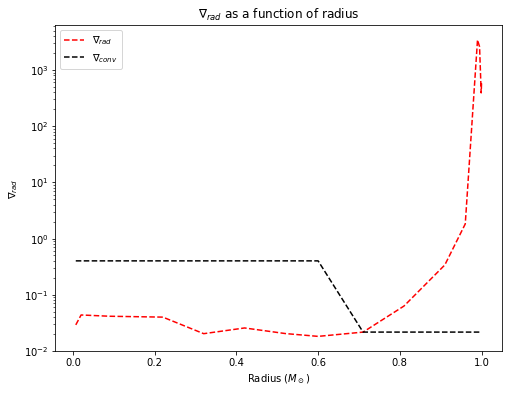

In [196]:
plt.figure(figsize = [8, 6])
plt.plot(r, n_rad, '--r', label = r'$\nabla_{rad}$')
plt.plot(r, n_conv, '--k', label = r'$\nabla_{conv}$')
plt.yscale('log')
plt.xlabel(r'Radius $(M_\odot)$')
plt.ylabel(r'$\nabla_{rad}$')
plt.title(r'$\nabla_{rad}$ as a function of radius')
plt.legend()
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/nablaradradius.png')

<h2>(b)</h2>

In [207]:
print('Minimum radiative temperature gradient: '\
    +format(min(n_rad[r > .7])[0], '.2E'))
# NP Printing minimum temperature gradient after 0.7 R_o
print('gamma: ' +format(1 /(1 -min(n_rad[r > 0.7])[0]), '.2E'))

Minimum radiative temperature gradient: 2.16E-02
gamma: 1.02E+00


<h2>(c)</h2>

In [213]:
print('Luminosity difference: ' +format(.4/n_rad\
    [r == 0.09][0][0], '.2E') +' times.')
# NP Calculating luminosity difference to make core convective
print('Mass difference: ' +format((.4 /n_rad[r ==\
    0.09][0][0]) **(1 /3.5), '.2E') +' times.')
# NP Calculating mass difference to make core convective

Luminosity difference: 9.68E+00 times.
Mass difference: 1.91E+00 times.
